# Data Pre-Processing

### Import required libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [97]:
dframe = pd.read_csv('C:\\Users\\SHADOW\\Project\\Disease\\Datasets\\diabetes2.csv')

In [98]:
dframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
dframe.shape

(768, 9)

In [100]:
dframe.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Rename the columns

In [101]:
dframe = dframe.rename(columns = {'Outcome' : 'target',
                                  })

In [102]:
dframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Engineering

In [103]:
dframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
target                      0
dtype: int64

In [104]:
dframe.dropna(how='any', inplace=True)

In [105]:
dframe.shape

(768, 9)

**Removing Outliers**

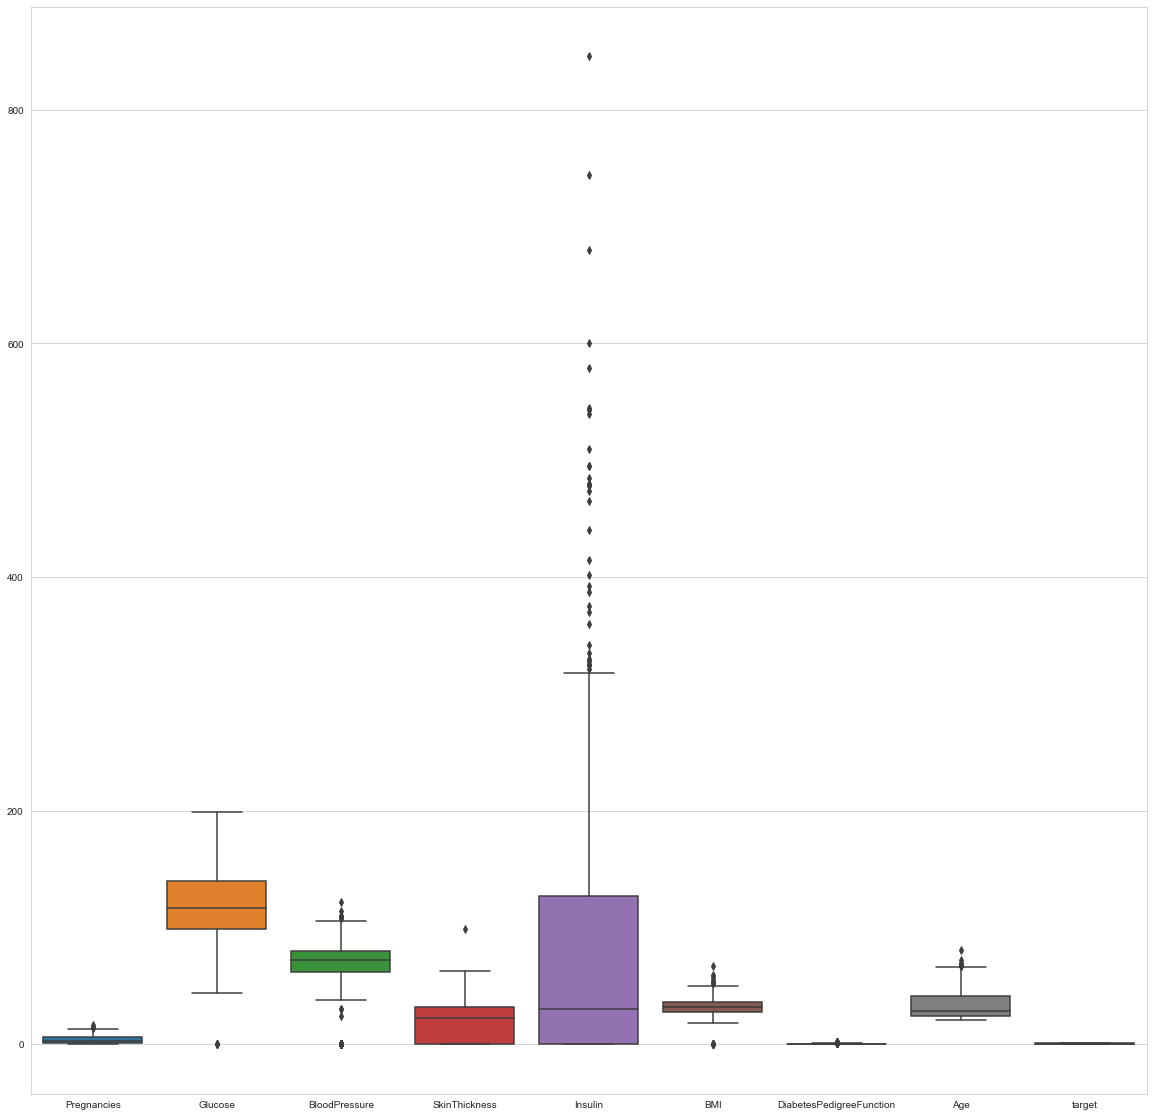

In [106]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=dframe)

In [107]:
#z_score
z = np.abs(stats.zscore(dframe))
print(z)

[[0.63994726 0.84832379 0.14964075 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.12339636 0.16054575 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 1.94372388 0.26394125 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.00330087 0.14964075 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.1597866  0.47073225 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.8730192  0.04624525 ... 0.47378505 0.87137393 0.73212021]]


In [108]:
#Quartiles
Q1 = dframe.quantile(0.25)
Q3 = dframe.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
target                        1.0000
dtype: float64


In [109]:
dframe = dframe[(z < 3).all(axis=1)]
dframe.shape

(688, 9)

In [110]:
dframe = dframe[~((dframe < (Q1 - 1.5 * IQR)) |(dframe > (Q3 + 1.5 * IQR))).any(axis=1)]
dframe.shape

(639, 9)

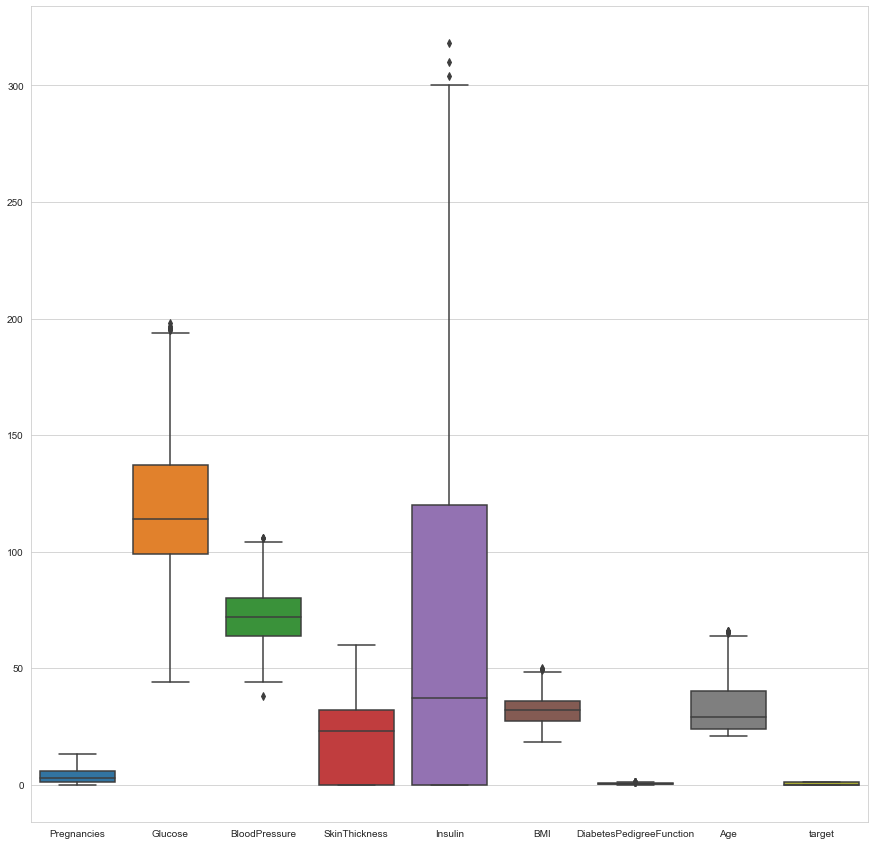

In [111]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(data=dframe)

### Feature Selection

**Heatmap showing correlation**

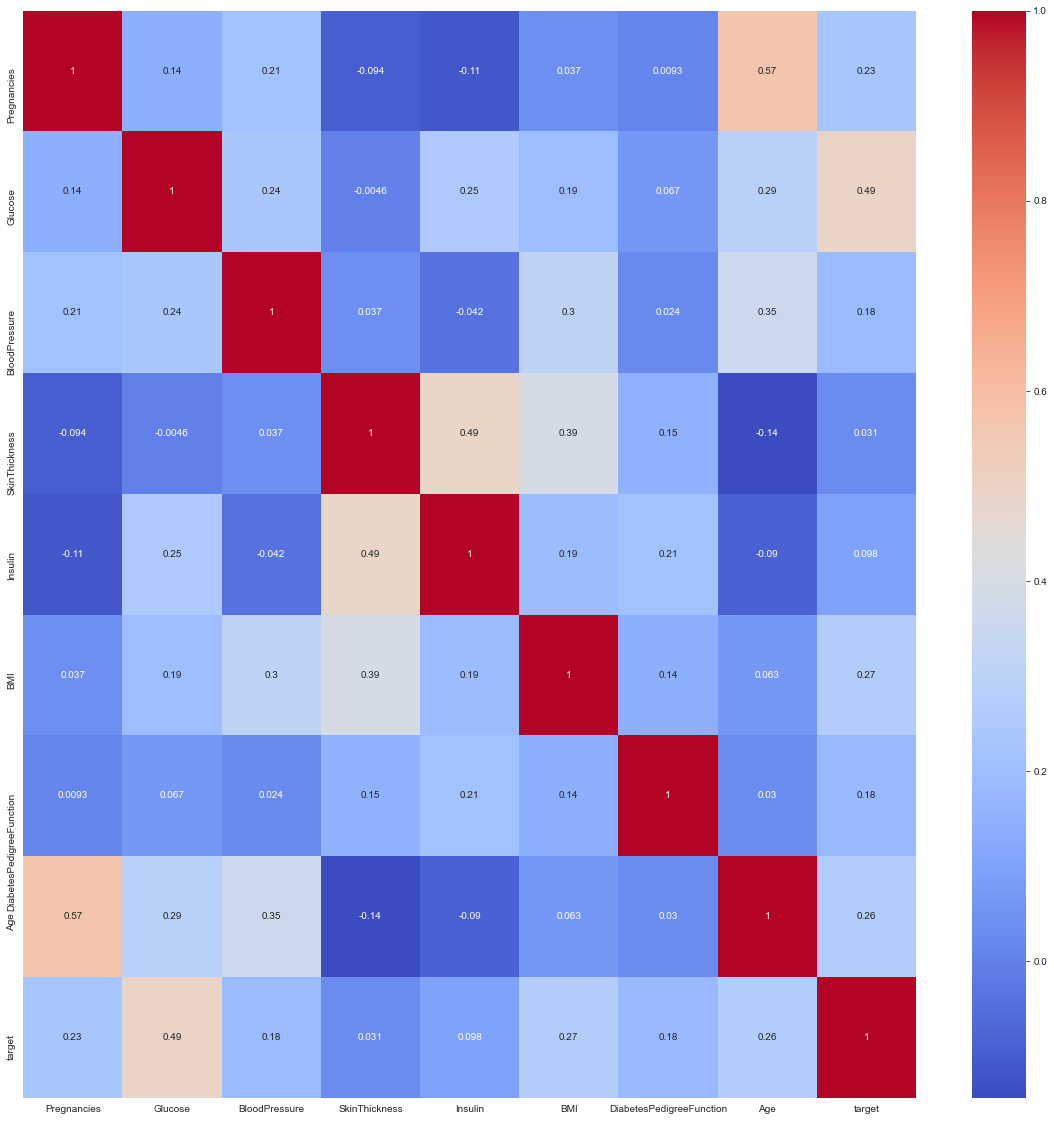

In [112]:
plt.figure(figsize=(20,20))
d = sns.heatmap(dframe.corr(),cmap="coolwarm",annot= True)

All features are important

_Check whether the target column has approximately equal number zero's and one's_

<AxesSubplot:xlabel='target', ylabel='count'>

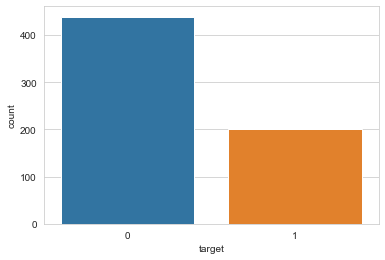

In [113]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=dframe)

Some statistical features:

In [114]:
dframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


**Find the categorical Features**

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

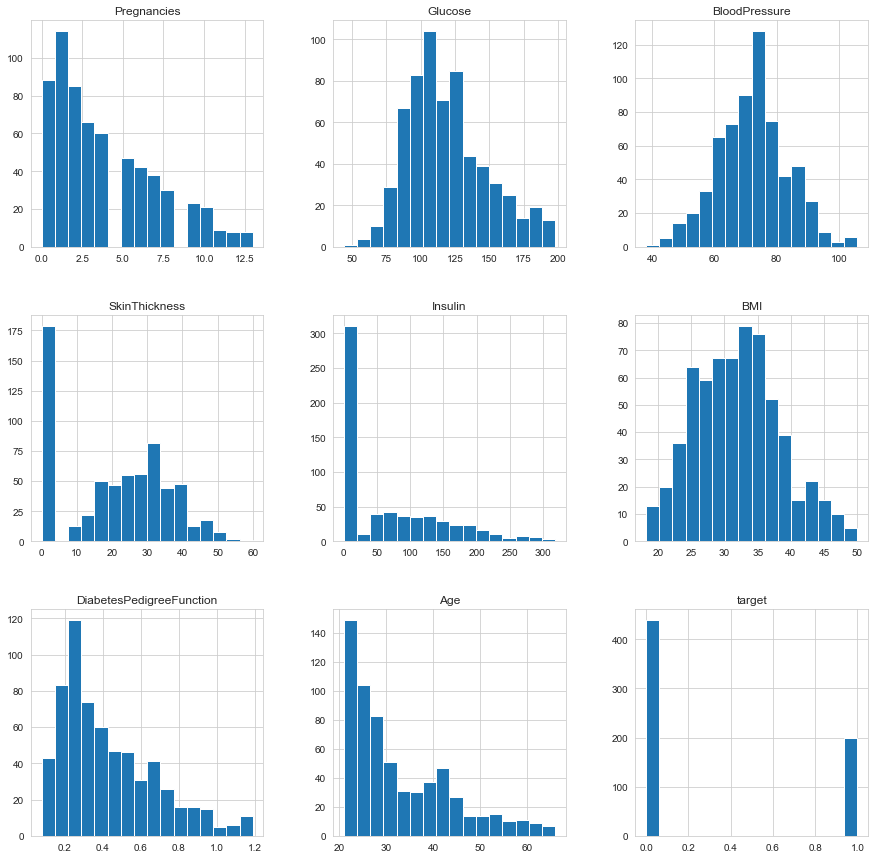

In [115]:
dframe.hist(bins=16, figsize=(15, 15))

## Functions

In [116]:
def measures(predictor):

    result = confusion_matrix(y_test, predictor)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, predictor)
    print("Classification Report:",)
    print (result1)
    result2 = accuracy_score(y_test, predictor)
    print("Accuracy:",result2)

In [117]:
def cv_score(object):
    score=cross_val_score(object,X_train,y_train,cv=10)
    print('Mean score =', score.mean())

In [118]:
def ROC(object):
    #ROC_curve
    y_pred_proba = object.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    #ROC-AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print('ROC-AUC: ', auc)
    
    #Plot curve
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.show()

## Model Selection

### Import the libraries

In [119]:
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [120]:
X = dframe.drop(['target'], axis = 1)
y = dframe[['target']]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 7)

In [122]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
479,4,132,86,31,0,28.0,0.419,63
227,3,162,52,38,0,37.2,0.652,24
460,9,120,72,22,56,20.8,0.733,48
481,0,123,88,37,0,35.2,0.197,29
52,5,88,66,21,23,24.4,0.342,30
...,...,...,...,...,...,...,...,...
702,1,168,88,29,0,35.0,0.905,52
608,0,152,82,39,272,41.5,0.270,27
650,1,91,54,25,100,25.2,0.234,23
238,9,164,84,21,0,30.8,0.831,32


### Feature Scaling

After exploring the dataset, I observed that I need to scale all the values before training the Machine Learning models.
_Perform scaling for all the features_

In [79]:
#Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Logistic Regression

In [123]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [124]:
cv_score(lr_classifier)

Mean score = 0.7697474747474748


In [125]:
y_pred_lr = lr_classifier.predict(X_test)

In [126]:
measures(y_pred_lr)

Confusion Matrix:
[[123  14]
 [ 27  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       137
           1       0.67      0.51      0.58        55

    accuracy                           0.79       192
   macro avg       0.74      0.70      0.72       192
weighted avg       0.78      0.79      0.78       192

Accuracy: 0.7864583333333334


ROC-AUC:  0.8517584605175846


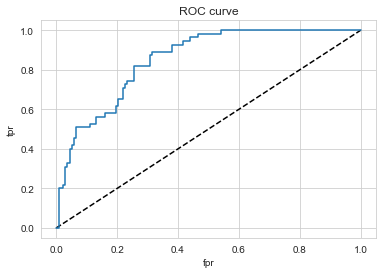

In [127]:
ROC(lr_classifier)

## Decision Tree Classifier

In [132]:
dt_classifier = DecisionTreeClassifier(random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [133]:
cv_score(dt_classifier)

Mean score = 0.6983333333333333


In [134]:
y_pred_dt = dt_classifier.predict(X_test)

In [135]:
measures(y_pred_dt)

Confusion Matrix:
[[112  25]
 [ 25  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       137
           1       0.55      0.55      0.55        55

    accuracy                           0.74       192
   macro avg       0.68      0.68      0.68       192
weighted avg       0.74      0.74      0.74       192

Accuracy: 0.7395833333333334


ROC-AUC:  0.6814863968148639


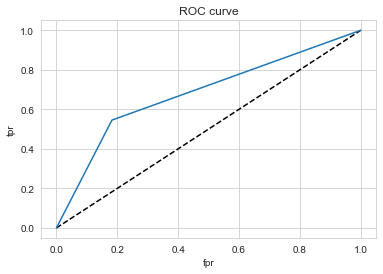

In [136]:
ROC(dt_classifier)

## Random Forest Classifer

In [137]:
rf_classifier = RandomForestClassifier(criterion = 'entropy', random_state = 7)
parameters = {'n_estimators' :np.arange(10,110,10)}
rf_classifier = RandomizedSearchCV(rf_classifier, parameters, cv=10)
rf_classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=7),
                   param_distributions={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])})

In [138]:
print(rf_classifier.best_params_)

{'n_estimators': 20}


In [139]:
cv_score(rf_classifier)

Mean score = 0.7720707070707071


In [140]:
y_pred_rf = rf_classifier.predict(X_test)

In [141]:
measures(y_pred_rf)

Confusion Matrix:
[[125  12]
 [ 32  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       137
           1       0.66      0.42      0.51        55

    accuracy                           0.77       192
   macro avg       0.73      0.67      0.68       192
weighted avg       0.76      0.77      0.75       192

Accuracy: 0.7708333333333334


ROC-AUC:  0.8027206370272064


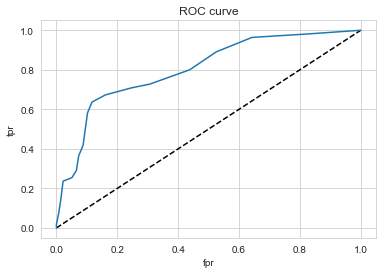

In [142]:
ROC(rf_classifier)

## KNN classifier

In [143]:
knn_classifier = KNeighborsClassifier()
parameters = {'n_neighbors' :np.arange(21)}
knn_classifier = RandomizedSearchCV(knn_classifier, parameters, cv=10)
knn_classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [144]:
print(knn_classifier.best_params_)

{'n_neighbors': 12}


In [145]:
cv_score(knn_classifier)

Mean score = 0.7518181818181817


In [146]:
y_pred_knn = knn_classifier.predict(X_test)

In [147]:
measures(y_pred_knn)

Confusion Matrix:
[[128   9]
 [ 39  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       137
           1       0.64      0.29      0.40        55

    accuracy                           0.75       192
   macro avg       0.70      0.61      0.62       192
weighted avg       0.73      0.75      0.72       192

Accuracy: 0.75


ROC-AUC:  0.7967485069674851


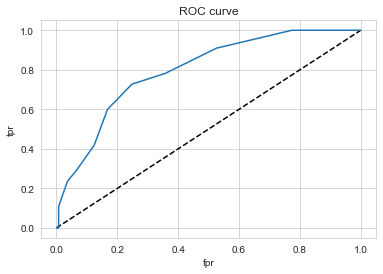

In [148]:
ROC(knn_classifier)

## Naive Bayes Classifier

In [149]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [150]:
cv_score(nb_classifier)

Mean score = 0.7472222222222221


In [151]:
y_pred_nb = nb_classifier.predict(X_test)

In [152]:
measures(y_pred_nb)

Confusion Matrix:
[[119  18]
 [ 25  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       137
           1       0.62      0.55      0.58        55

    accuracy                           0.78       192
   macro avg       0.73      0.71      0.71       192
weighted avg       0.77      0.78      0.77       192

Accuracy: 0.7760416666666666


ROC-AUC:  0.8199071001990711


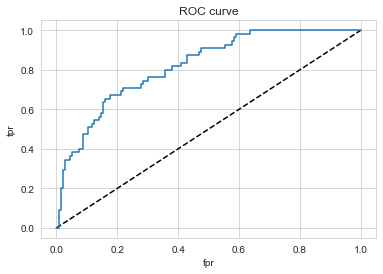

In [153]:
ROC(nb_classifier)

## Support Vector Machine

In [154]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [155]:
cv_score(svm_classifier)

Mean score = 0.7674242424242423


In [156]:
y_pred_svm = svm_classifier.predict(X_test)

In [157]:
measures(y_pred_svm)

Confusion Matrix:
[[125  12]
 [ 27  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       137
           1       0.70      0.51      0.59        55

    accuracy                           0.80       192
   macro avg       0.76      0.71      0.73       192
weighted avg       0.79      0.80      0.79       192

Accuracy: 0.796875


## Save the model

In [128]:
filename = 'lr_classifier_diabetics.pkl'
pickle.dump(lr_classifier, open(filename, 'wb'))

In [133]:
temp_array = [0,123,88,37,0,35.2,0.197,29]
temp_array5 = [3,162,52,38,0,37.2,0.652,24]


In [134]:
data = np.array([temp_array])
data

array([[  0.   , 123.   ,  88.   ,  37.   ,   0.   ,  35.2  ,   0.197,
         29.   ]])

In [135]:
my_prediction = int(lr_classifier.predict(data))
my_prediction

0

In [ ]:
	Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age